<a href="https://colab.research.google.com/github/jsscmaina/machinelearning4102/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
m = 0
c = 0
L = 0.0001 #learning rate
epoch = 100
epoch_error_list = []
epoch_count_list = []

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
data = pd.read_csv('data.csv', header = 0)
data.head(3)

,size_in_sq_ft,price_x1000_sh
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382


In [0]:
X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N = float(len(X))

In [0]:
def L2(N,Y,Y_hat,L,w,Norm):#the L2 function for error computation
  A=(L*(w**2)**1/2)
  B=((1/N)*sum(Y-Y_hat)**2)
  return B - A

In [0]:
def gradient_descent_fit(m, c, N, L):
  for i in range(epoch): 
    Y_hat = m*X +c
    epoch_count_list.append(i)
    epoch_error = mse(N, Y, Y_hat)
    epoch_error_list.append(epoch_error)
    D_m = (-2/N) * sum(X * (Y -Y_hat))
    D_c = (-2/N) * sum(Y-Y_hat)
    m = m-(L * D_m)
    c = c-(L * D_c)
  print ("Final m is: " ,m, "and final c is ", c)
  return Y_hat


Final m is:  1.4788027175308887 and final c is  0.03507497059521459


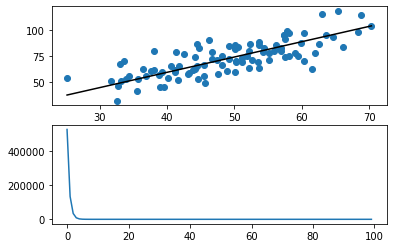

In [0]:
fig,(ax1, ax2) = plt.subplots(2)
ax1.scatter(X, Y)
#plt.xlabel('office size in sq ft')
#plt.ylabel('Monthly Rent in Ksh.')
Y_hat = gradient_descent_fit(m, c, N, L)
ax1.plot([min(X), max(X)], [min(Y_hat), max(Y_hat)], color='black')
ax2.plot(epoch_count_list, epoch_error_list)